In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from datapreprocessing import df_final
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [8]:
df_visu = df_final.copy()

In [5]:
df_visu.head()

,nom_dep,Moins de 20 ans,Moins de 25 ans,25 à 64 ans,65 ans ou plus,75 ans ou plus,80 ans ou plus,85 ans ou plus,pop_totale,Moins de 20 ans.1,Moins de 25 ans.1,25 à 64 ans.1,65 ans ou plus.1,75 ans ou plus.1,80 ans ou plus.1,85 ans ou plus.1,nb hospitalisations,nb deces,espérance de vie,passage_urg_corona,nb_etab_sante,esp_de_vie_H_60,esp_de_vie_F_60,esp_de_vie_H_65,esp_de_vie_F_65,rapport nv_vie interdécile D9/D1,indicateur pauvreté 1,indicateur pauvreté 2,patients positifs,patients testés,ratio patients positifs/population,ratio patients positifs/testés,ratio patients testés/population
num_dep,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,Ain,171336.0,203449.0,344459.0,131590.0,61926.0,35163.0,18688.0,679498.0,25.215085,29.941074,50.693159,19.365767,9.113493,5.174850,2.750266,5924,874,71.9,3176.0,214,24.4,27.9,20.3,23.4,3.5,20.4,18.2,392838.0,2601627.0,57.812974,15.099705,382.874858
02,Aisne,125708.0,152860.0,251931.0,116841.0,53128.0,29580.0,16774.0,521632.0,24.098982,29.304184,48.296692,22.399124,10.184958,5.670664,3.215677,10705,1647,86.0,4350.0,230,21.9,26.3,18.2,21.9,3.1,20.1,20.3,272177.0,1932208.0,52.177972,14.086320,370.415925
03,Allier,66246.0,81986.0,152745.0,97977.0,49747.0,29925.0,17424.0,332708.0,19.911153,24.642028,45.909626,29.448345,14.952150,8.994373,5.237025,7585,977,139.2,2568.0,164,23.1,27.2,19.4,23.0,3.0,20.1,21.0,174112.0,1273660.0,52.331774,13.670210,382.816163
04,Alpes-de-Haute-Provence,33920.0,40903.0,80162.0,47096.0,23412.0,13630.0,7259.0,168161.0,20.171146,24.323714,47.669793,28.006494,13.922372,8.105328,4.316696,3484,399,128.9,1780.0,98,24.1,27.7,20.0,23.3,3.2,20.5,19.9,99411.0,807426.0,59.116561,12.312088,480.150570
05,Hautes-Alpes,27874.0,33506.0,68377.0,39778.0,19651.0,11323.0,6406.0,141661.0,19.676552,23.652240,48.268048,28.079711,13.871849,7.993026,4.522063,3710,412,124.9,1676.0,87,24.4,28.6,20.4,24.2,3.0,19.9,19.6,82765.0,593457.0,58.424690,13.946251,418.927581


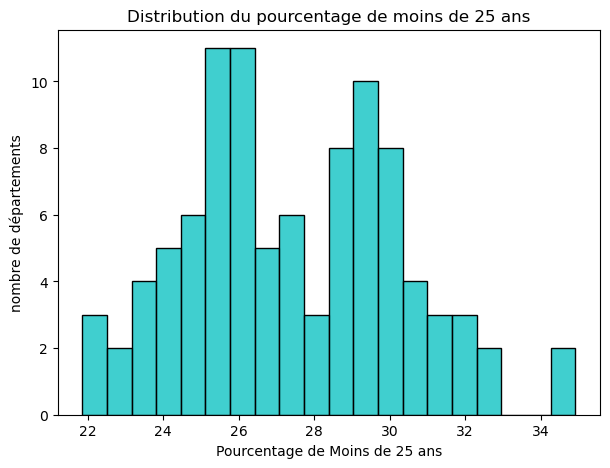

In [50]:
"""On regarde la fréquence des départements en fonction du taux la population de moins de 25 ans """
moins_de_25 = df_visu["Moins de 25 ans.1"]
plt.figure(figsize=(7, 5))
sns.histplot(moins_de_25, bins=20, kde=False, color='c')
plt.title('Distribution du pourcentage de moins de 25 ans')
plt.xlabel('Pourcentage de Moins de 25 ans')
plt.ylabel('nombre de départements')
plt.show()

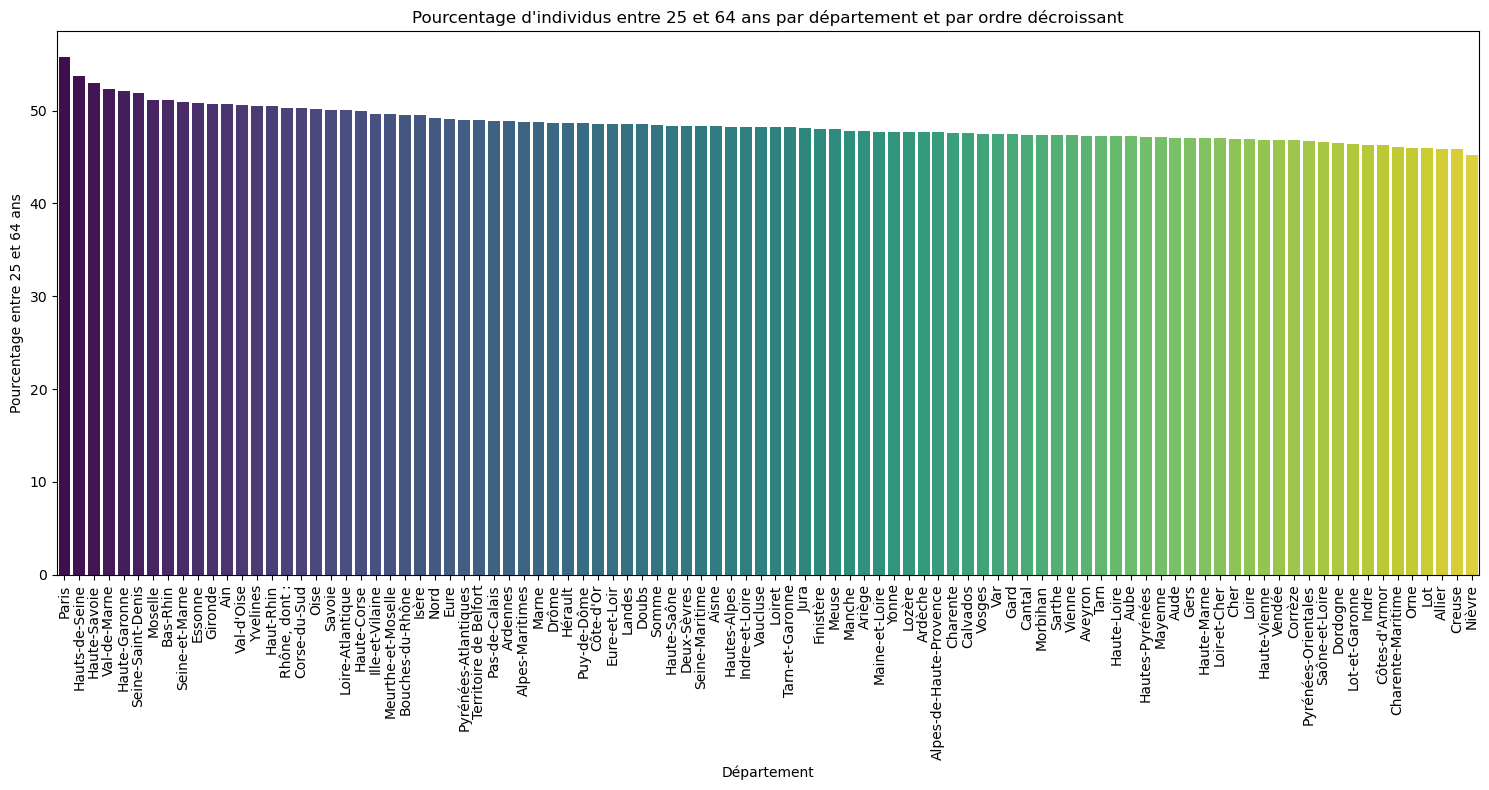

In [ ]:
"""On regarde la fréquence des départements en fonction du taux la population de 25 à 64 ans """
sorted_df = df_visu.sort_values(by="25 à 64 ans.1", ascending=False)


plt.figure(figsize=(15, 8))
sns.barplot(x='nom_dep', y='25 à 64 ans.1', data=sorted_df, palette='viridis')
plt.xticks(rotation=90)#pour que l'on voit les noms des départements
plt.title('Pourcentage d\'individus entre 25 et 64 ans par département et par ordre décroissant')
plt.xlabel('Département')
plt.ylabel('Pourcentage entre 25 et 64 ans')
plt.tight_layout()
plt.show()

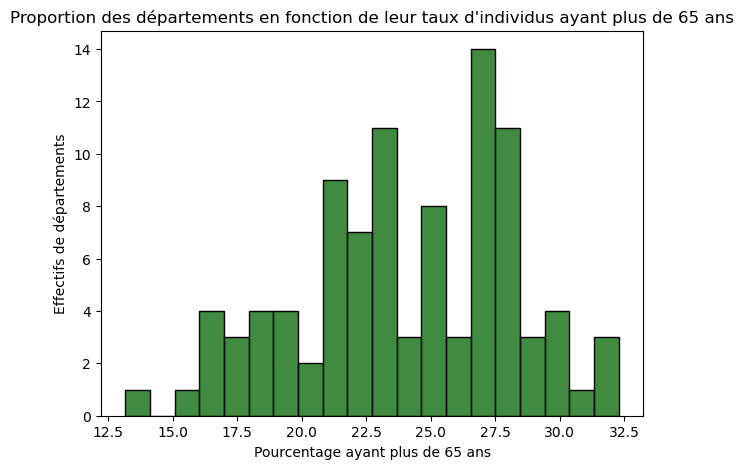

In [53]:
"""puis, désormais, on regarde la répartition des plus vieux"""
plus_de_65 = df_visu["65 ans ou plus.1"]
plt.figure(figsize=(7,5))
sns.histplot(plus_de_65, bins=20, kde=None, color="darkgreen")
plt.title("Proportion des départements en fonction de leur taux d\'individus ayant plus de 65 ans")
plt.xlabel("Pourcentage ayant plus de 65 ans")
plt.ylabel("Effectifs de départements")
plt.show()

In [61]:
""" Représentons par un barplot les différentes chances de survie à une hospitalisation de la Covid selon le départemet d'hospitalisation"""
df_visu["chance_de_survie"] = ((df_visu["nb hospitalisations"]/df_visu["nb deces"])**-1)*100

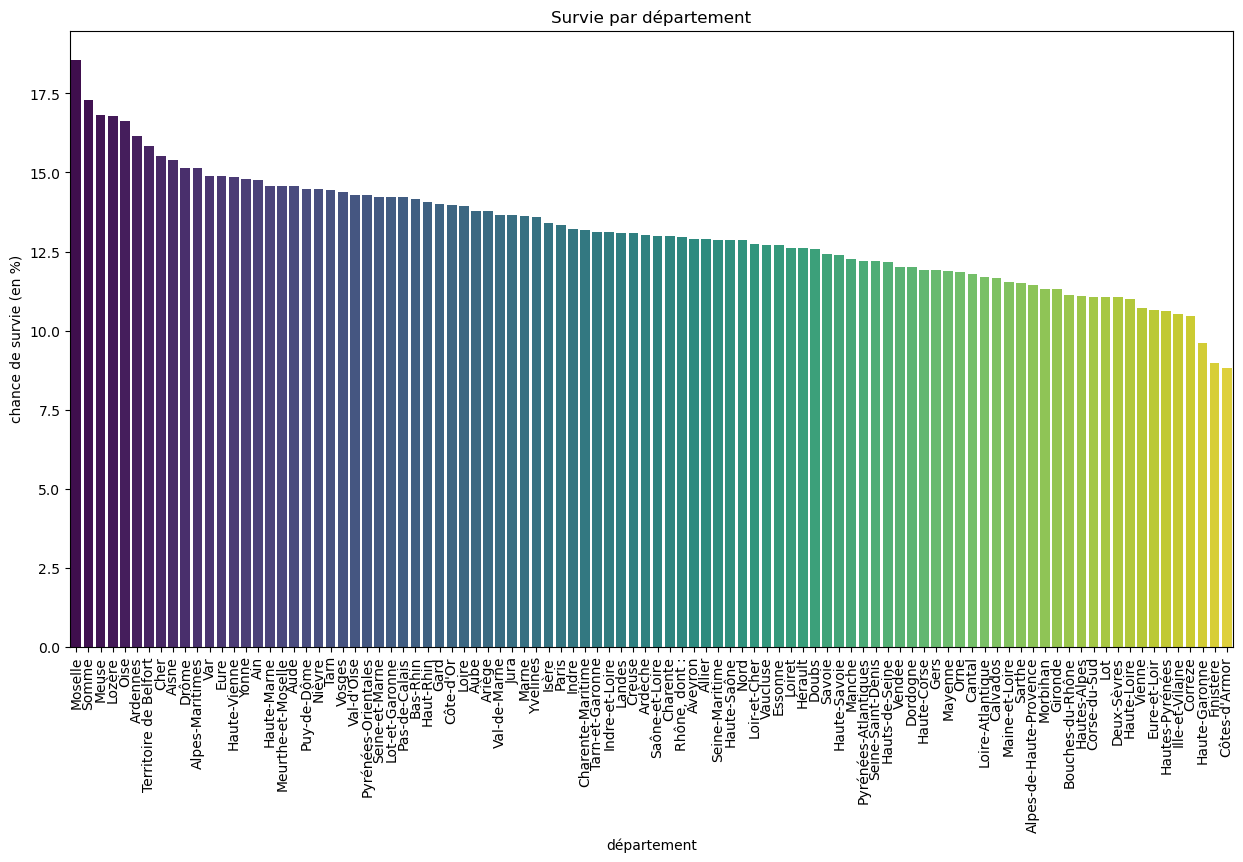

In [62]:
sort_chance_de_survie = df_visu.sort_values(by = "chance_de_survie", ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x="nom_dep", y="chance_de_survie", data=sort_chance_de_survie,palette = "viridis")
plt.xticks(rotation=90)
plt.title("Survie par département")
plt.xlabel("département")
plt.ylabel("chance de survie (en %)")
plt.show()